<a href="https://colab.research.google.com/github/nidhinraj3/PredictPricingDynamicsAssignment/blob/main/HousePricingDynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<font color='Navy' size='4'><b>House Pricing Dynamics Assignment</b></font>
<font size='2'>
Assignment is to understand the pricing dynamics of houses in Australian market.
To have a clear view on factors affecting the pricing of houses.
<br/>
</font>
<font size='2'>
To do this we have to model the pricing of houses with the available independent variables to achieve below:
</font>

- <font size='2'>Which variables are significant in predicting the pricing of houses.</font>
- <font size='2'>How well each of those variables affect the pricing</font>

<font size='2' color='grey'>**Business Objective**</font>

<font size='2'>
To develop an investment strategy for Australian Market based on various factors affecting pricing of houses <font>

- <font size='2'>Understand how exactly the pricing vary with different features to aid in deciding business strategy to identify the prospective properties to buy</font> 

- <font size='2'>Understand the demand dynamics of a new market.</font>
<br />

###<font color='Navy' size='4'><b>Coding Structure</b></font>
<font size='2'>
Please find below a high level overview of steps followed in this notebook
<br/>
Step 1: Data Understanding - An initial analysis of the data and understanding each variable in the dataset
<br/>
Step 2: Data Cleansing - Cleaning exercises on data, removing duplicates, missing value imputation etc.
<br/>
Step 3: Exploratory Data Analysis - Analysing the data to find observations possible by multivariate analysis
<br/>
Step 5: Data Preparation for Modelling - Apply One Hot Encoding for categorical variables
<br/>
Step 6: Splitting the Data into Training and Testing Sets - Splitting test and train data and rescaling 
<br/>
Step 7: Predict using regression using SciKit and hyperparameters
<br/>
Step 8: Residual Analysis of the train data - 
<br/>
Step 9: Regularization using Lasso & Ridge model
<br/>
Step 10: Model Evaluation
<br/>
Step 11: Summary


</font>

#####<font size='4' color='Navy'><b>Step 1. Data Understanding</b></font>

In [1292]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [1293]:
#read the dataset
house_pricing=pd.read_csv("train.csv")

In [1294]:
#check size of the dataset
house_pricing.shape

(1460, 81)

<font size='2' color='purple'><b>Dataset contains 1460 rows and 81 columns</b></font>

In [1295]:
#read first few records of the data
house_pricing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1296]:
#information about the dataframe with full summary and col counts
house_pricing.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<font color='purple' size='2'>- There is 35 integer column</font><br />
<font color='purple' size='2'>- There is 40 obect type(categorical) column</font><br />
<font color='purple' size='2'>- There is 3 float type column</font><br />
<font color='purple' size='2'>- Some of the columns like PoolQC,MiscFeature,Fence,FirePlaceQu has very less number of non-null values and by quick overview can be dropped</font><br />

<font size='2' color='purple'><b><u>Data Dictinary for the dataset</u></b></font>
<br />
<font size='2' color='purple'>
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
</font>
<font size='2' color='purple'>
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
<font size='2' color='purple'>
LotFrontage: Linear feet of street connected to property<br/>
<font size='2' color='purple'>
LotArea: Lot size in square feet<br/>
<font size='2' color='purple'>
Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
<font size='2' color='purple'>      	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
<font size='2' color='purple'>
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
<font size='2' color='purple'>      
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
<font size='2' color='purple'>
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
<font size='2' color='purple'>	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
<font size='2' color='purple'>	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
<font size='2' color='purple'>	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
<font size='2' color='purple'>			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
<font size='2' color='purple'>	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
<font size='2' color='purple'>	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
<font size='2' color='purple'>	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
<font size='2' color='purple'>	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
<font size='2' color='purple'>	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
<font size='2' color='purple'>		
YearBuilt: Original construction date<br />
<font size='2' color='purple'>
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)<br />
<font size='2' color='purple'>	
RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
<font size='2' color='purple'>			
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
<font size='2' color='purple'>			
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
<font size='2' color='purple'>		
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
<font size='2' color='purple'>		
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
<font size='2' color='purple'>		
MasVnrArea: Masonry veneer area in square feet<br />
<font size='2' color='purple'>	
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
<font size='2' color='purple'>			
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
<font size='2' color='purple'>			
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
<font size='2' color='purple'>			
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
<font size='2' color='purple'>			
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
<font size='2' color='purple'>		
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
<font size='2' color='purple'>		
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
<font size='2' color='purple'>			
BsmtFinSF1: Type 1 finished square feet<br />
<font size='2' color='purple'>	
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
<font size='2' color='purple'>
BsmtFinSF2: Type 2 finished square feet<br />
<font size='2' color='purple'>
BsmtUnfSF: Unfinished square feet of basement area<br />
<font size='2' color='purple'>
TotalBsmtSF: Total square feet of basement area<br />
<font size='2' color='purple'>
Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
<font size='2' color='purple'>	
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
<font size='2' color='purple'>
CentralAir: Central air conditioning

       N	No
       Y	Yes
<font size='2' color='purple'>		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
<font size='2' color='purple'>		
1stFlrSF: First Floor square feet<br />
<font size='2' color='purple'>
2ndFlrSF: Second floor square feet<br />
<font size='2' color='purple'>
LowQualFinSF: Low quality finished square feet (all floors)<br />
<font size='2' color='purple'>
GrLivArea: Above grade (ground) living area square feet<br />
<font size='2' color='purple'>
BsmtFullBath: Basement full bathrooms<br />
<font size='2' color='purple'>
BsmtHalfBath: Basement half bathrooms<br />
<font size='2' color='purple'>
FullBath: Full bathrooms above grade<br />
<font size='2' color='purple'>
HalfBath: Half baths above grade<br />
<font size='2' color='purple'>
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)<br />
<font size='2' color='purple'>
Kitchen: Kitchens above grade<br />
<font size='2' color='purple'>
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
<font size='2' color='purple'>      	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br/>
<font size='2' color='purple'>
Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
<font size='2' color='purple'>
Fireplaces: Number of fireplaces
<font size='2' color='purple'>
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry 
<font size='2' color='purple'>
Fireplace in basement

       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
<font size='2' color='purple'>
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
<font size='2' color='purple'>
GarageYrBlt: Year garage was built<br/>
<font size='2' color='purple'>
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
<font size='2' color='purple'>		
GarageCars: Size of garage in car capacity<br />
<font size='2' color='purple'>
GarageArea: Size of garage in square feet<br />
<font size='2' color='purple'>
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
<font size='2' color='purple'>		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
<font size='2' color='purple'>		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
<font size='2' color='purple'>		
WoodDeckSF: Wood deck area in square feet<br />
<font size='2' color='purple'>
OpenPorchSF: Open porch area in square feet<br />
<font size='2' color='purple'>
EnclosedPorch: Enclosed porch area in square feet<br/>
<font size='2' color='purple'>
3SsnPorch: Three season porch area in square feet<br/>
<font size='2' color='purple'>
ScreenPorch: Screen porch area in square feet<br/>
<font size='2' color='purple'>
PoolArea: Pool area in square feet<br/>
<font size='2' color='purple'>
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
<font size='2' color='purple'>
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
<font size='2' color='purple'>	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
<font size='2' color='purple'>		
MiscVal: $Value of miscellaneous feature<br />
<font size='2' color='purple'>	
MoSold: Month Sold (MM)<br/>
<font size='2' color='purple'>	
YrSold: Year Sold (YYYY)<br/>
<font size='2' color='purple'>	
SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
<font size='2' color='purple'>	
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
</font>

In [1297]:
#splitting the numerical columns into multiple lists to analyse further
colnames_numerics_only = house_pricing.select_dtypes(include=np.number).columns.tolist()
print(len(colnames_numerics_only))
#38 numerical columns available
colnames_categorical_only = house_pricing.select_dtypes(include=np.object).columns.tolist()
print(len(colnames_categorical_only))
#43 categorical variables available

38
43


In [1298]:
#splitting columns into multiple arrays for easy analysis
numeric_list1=colnames_numerics_only[:20]
numeric_list2=colnames_numerics_only[21:]
categ_list1=colnames_categorical_only[:20]
categ_list2=colnames_categorical_only[20:]


In [1299]:
#describe each list to get a highlevel overview of basic statistics of columns
house_pricing[numeric_list1].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000


<font size='2' color='purple'>- 75% of houses are built after 2000</font><br />
<font size='2' color='purple'>- 75% of houses have an overall condition rating of 6/10 and an overall quality of 7/10</font><br />
<font size='2' color='purple'>- 75% of houses have undergone some remodelling after 2004</font><br />
<font size='2' color='purple'>- Since the max value available in the year built is 2010 , it can be assumed that this data is till 2010</font><br />
<font size='2' color='purple'>- 50% of the houses are having 2 or more bathrooms</font><br />
<font size='2' color='purple'>- 75% of the houses are having lot area more than 10000 , it implies this dataset or the area is known for big houses </font><br />

In [1300]:
house_pricing[numeric_list2].describe()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<font size='2' color='purple'>- Pools are only avilable in very few houses, This factor seems not significant</font><br />
<font size='2' color='purple'>- 75% of houses have garage option for 2 cars</font><br />
<font size='2' color='purple'>- We can see outliers in the price data, which says few houses are very expensive</font><br />
<font size='2' color='purple'>- Target variable for this modelling is the Sales Price Field</font><br />

<font color='Purple' size='2'><b><u>Target Variable</u></b></font><br /><br />

<font color='Purple' size='2'>The 'Sale Price' variable indicates the pricing of house</font><br />

<font color='Purple' size='2'><b>The model will be built by considering 'Sale Price' as the target variable.</b></font>

#####<font size='4' color='Navy'><b>Step 2. Data Cleansing</b></font>

<font color='purple' size='2'><b><u>Check for duplicates</u></b></font>

In [1301]:
df_check=house_pricing
#drop duplicates function will remove duplicate rows from the dataset
df_check=df_check.drop_duplicates()
#check the shape to see if any data got removed
df_check.shape

(1460, 81)

- <font color='purple' size='2'><b>Same number of rows as original , so no duplicates</b></font>

<font color='purple' size='2'><b><u>Check for missing values</u></b></font>

In [1302]:
#Check if any columns contains null values and if it exists how is the percentage of null value
null_info=df_check.isnull().sum();
df_null = pd.DataFrame({'Column':null_info.index, 'NullCount':null_info.values})
df_null["NullPercentage"]=(df_null.NullCount/1460)*100
print(df_null[df_null.NullCount>0].count())
print(df_null[df_null.NullCount>0])

Column            19
NullCount         19
NullPercentage    19
dtype: int64
          Column  NullCount  NullPercentage
3    LotFrontage        259       17.739726
6          Alley       1369       93.767123
25    MasVnrType          8        0.547945
26    MasVnrArea          8        0.547945
30      BsmtQual         37        2.534247
31      BsmtCond         37        2.534247
32  BsmtExposure         38        2.602740
33  BsmtFinType1         37        2.534247
35  BsmtFinType2         38        2.602740
42    Electrical          1        0.068493
57   FireplaceQu        690       47.260274
58    GarageType         81        5.547945
59   GarageYrBlt         81        5.547945
60  GarageFinish         81        5.547945
63    GarageQual         81        5.547945
64    GarageCond         81        5.547945
72        PoolQC       1453       99.520548
73         Fence       1179       80.753425
74   MiscFeature       1406       96.301370



<font color='Purple' size='2'>There are 19 columns with missing values</font><br />

<font color='Purple' size='2'><b>Columns with more than 40% missing values can cause bias and can be dropped</b></font>

<font color='Purple' size='2'><b>Based on above we can drop columns FireplaceQu, PoolQC, Fence, MiscFeature, Alley</b></font>

In [1303]:
#dropping columns identified in previous step
house_pricing=house_pricing.drop(['FireplaceQu','PoolQC','Fence','MiscFeature','Alley'],axis=1)

#id column is not helpful for any analysis , dropping ID column
house_pricing=house_pricing.drop(['Id'],axis=1)


In [1304]:
#Check if any columns contains null values and if it exists how is the percentage of null value
null_info=house_pricing.isnull().sum();
df_null = pd.DataFrame({'Column':null_info.index, 'NullCount':null_info.values})
df_null["NullPercentage"]=(df_null.NullCount/1460)*100
print(df_null[df_null.NullCount>0].count())
print(df_null[df_null.NullCount>0])

Column            14
NullCount         14
NullPercentage    14
dtype: int64
          Column  NullCount  NullPercentage
2    LotFrontage        259       17.739726
23    MasVnrType          8        0.547945
24    MasVnrArea          8        0.547945
28      BsmtQual         37        2.534247
29      BsmtCond         37        2.534247
30  BsmtExposure         38        2.602740
31  BsmtFinType1         37        2.534247
33  BsmtFinType2         38        2.602740
40    Electrical          1        0.068493
55    GarageType         81        5.547945
56   GarageYrBlt         81        5.547945
57  GarageFinish         81        5.547945
60    GarageQual         81        5.547945
61    GarageCond         81        5.547945


<font color='purple' size='2'><b><u>Impute missing values</u></b></font>

In [1305]:
#Define an imputer to handle missign vlaues, below we are using a simple imputer to replace missing values using median value
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

In [1306]:
#using imputer to transform numeric data after applying imputation
house_pricing.LotFrontage = imputer.fit_transform(house_pricing['LotFrontage'].values.reshape(-1,1))[:,0]
house_pricing.MasVnrArea = imputer.fit_transform(house_pricing['MasVnrArea'].values.reshape(-1,1))[:,0]
house_pricing.GarageYrBlt   = imputer.fit_transform(house_pricing['GarageYrBlt'].values.reshape(-1,1))[:,0]

In [1307]:
#define an imputer for categorical variables using most_frequent used strategy
imputer_categ = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [1308]:
#using imputer to transform data after applying imputation
house_pricing.MasVnrType = imputer_categ.fit_transform(house_pricing['MasVnrType'].values.reshape(-1,1))[:,0]
house_pricing.BsmtQual   = imputer_categ.fit_transform(house_pricing['BsmtQual'].values.reshape(-1,1))[:,0]
house_pricing.BsmtCond   = imputer_categ.fit_transform(house_pricing['BsmtCond'].values.reshape(-1,1))[:,0]
house_pricing.BsmtExposure   = imputer_categ.fit_transform(house_pricing['BsmtExposure'].values.reshape(-1,1))[:,0]
house_pricing.BsmtFinType1   = imputer_categ.fit_transform(house_pricing['BsmtFinType1'].values.reshape(-1,1))[:,0]
house_pricing.BsmtFinType2   = imputer_categ.fit_transform(house_pricing['BsmtFinType2'].values.reshape(-1,1))[:,0]
house_pricing.Electrical   = imputer_categ.fit_transform(house_pricing['Electrical'].values.reshape(-1,1))[:,0]
house_pricing.GarageType   = imputer_categ.fit_transform(house_pricing['GarageType'].values.reshape(-1,1))[:,0]
house_pricing.GarageFinish   = imputer_categ.fit_transform(house_pricing['GarageFinish'].values.reshape(-1,1))[:,0]
house_pricing.GarageQual   = imputer_categ.fit_transform(house_pricing['GarageQual'].values.reshape(-1,1))[:,0]
house_pricing.GarageCond   = imputer_categ.fit_transform(house_pricing['GarageCond'].values.reshape(-1,1))[:,0]

In [1309]:
#check data after imputation for missing value handling
null_info=house_pricing.isnull().sum();
df_null = pd.DataFrame({'Column':null_info.index, 'NullCount':null_info.values})
df_null["NullPercentage"]=(df_null.NullCount/1460)*100
print(df_null[df_null.NullCount>0].count())
print(df_null[df_null.NullCount>0])

Column            0
NullCount         0
NullPercentage    0
dtype: int64
Empty DataFrame
Columns: [Column, NullCount, NullPercentage]
Index: []


<font color='purple' size='2'><b>After Imputation we verified that there are no more missing values</b></font>

#####<font size='4' color='Navy'><b>Step 3. Feature Engineering</b></font>
Identifying new fields derived from existing variables which will help in analysis

<font color='purple' size='2'><b><u>Create a Field for Total Square Feet Area</u></b></font>

In [1310]:
house_pricing["TotalSquareFeet"]=house_pricing.TotalBsmtSF+house_pricing["1stFlrSF"]+house_pricing["2ndFlrSF"]

<font color='purple' size='2'><b><u>Create a Field to show TotalBathrooms</u></b></font>

In [1311]:
house_pricing["TotalBathrooms"]=house_pricing.BsmtFullBath+house_pricing.BsmtHalfBath+house_pricing.FullBath+house_pricing.HalfBath

#####<font size='4' color='Navy'><b>Step 4. Exploratory Data Analysis</b></font>

<font size='3' color='Green'><b>Analyse Categorical Variables</b></font>

<font color='purple' size='2'><b><u>Analyzing Sales Price Based on Sale Condition</u></b></font>

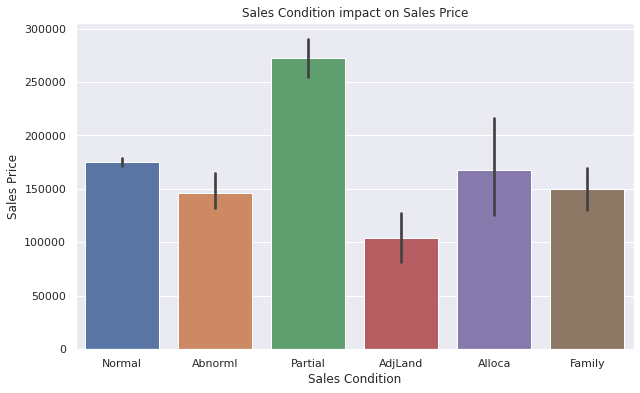

In [1312]:
plt.figure(figsize=(10,6))
sns.barplot(x=house_pricing.SaleCondition,y=house_pricing.SalePrice)
plt.title("Sales Condition impact on Sales Price")
plt.xlabel("Sales Condition")
plt.ylabel("Sales Price")
plt.show()

<font color='purple' size='2'><b>Partially completed or new homes are having high sales price</b></font>

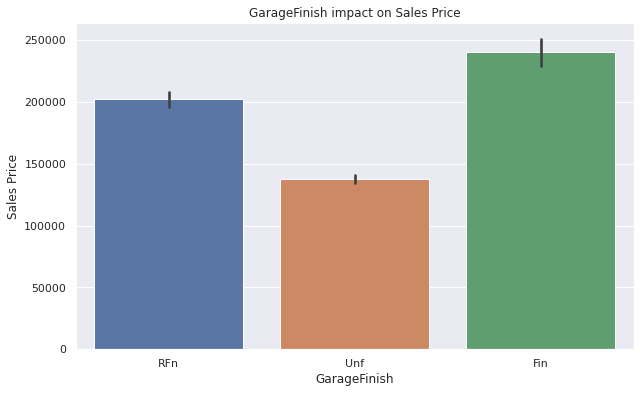

In [1313]:
plt.figure(figsize=(10,6))
sns.barplot(x=house_pricing.GarageFinish,y=house_pricing.SalePrice)
plt.title("GarageFinish impact on Sales Price")
plt.xlabel("GarageFinish")
plt.ylabel("Sales Price")
plt.show()

Garage Finish seems to have an impact on Price

<font color='purple' size='2'><b><u>Analysing Variables using box plot</u></b></font>

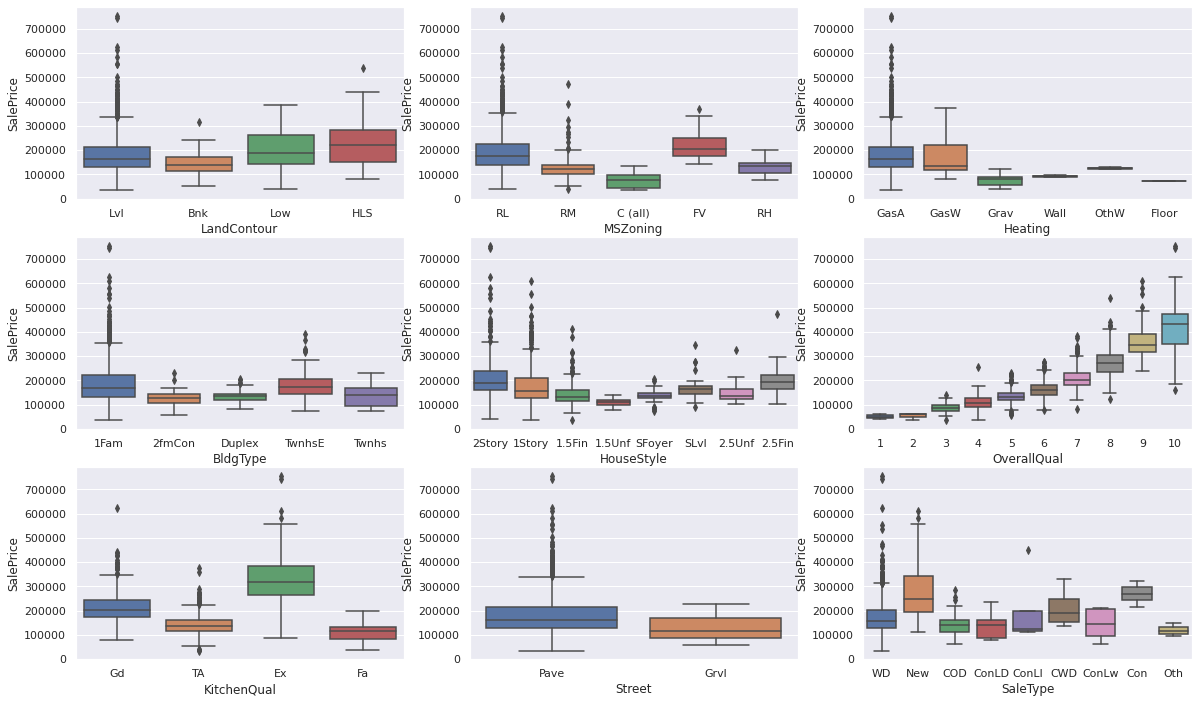

In [1314]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = house_pricing)
plt.subplot(3,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house_pricing)
plt.subplot(3,3,3)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = house_pricing)
plt.subplot(3,3,4)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house_pricing)
plt.subplot(3,3,5)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = house_pricing)
plt.subplot(3,3,6)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = house_pricing)
plt.subplot(3,3,7)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house_pricing)
plt.subplot(3,3,8)
sns.boxplot(x = 'Street', y = 'SalePrice', data = house_pricing)
plt.subplot(3,3,9)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = house_pricing)
plt.show()

<font color='purple' size='2'><b>Few observations based on above boxplots</b>
<br/>1) Hill Side properties has more price and hence more demand
<br />2)Residential Properties has more price and Floating Village options has the higher rate
<br />3)Gas based heating increases price of a property
<br />4)Single Family detached houses are high in price
<br />5)Kitchen Quality and Overall Quality has a direct linear influence on price as it should be
<br/>6)Paved streets increase property pricing
<br/>7)Two Story buildings are hot favorite in this market
<br/>8)New Houses are in high demand , also Contract Sales with Low Down payment and low interest is in high demand , but at the same time Contract Sale with 15% down payment and regular terms are in the least demand
</font>

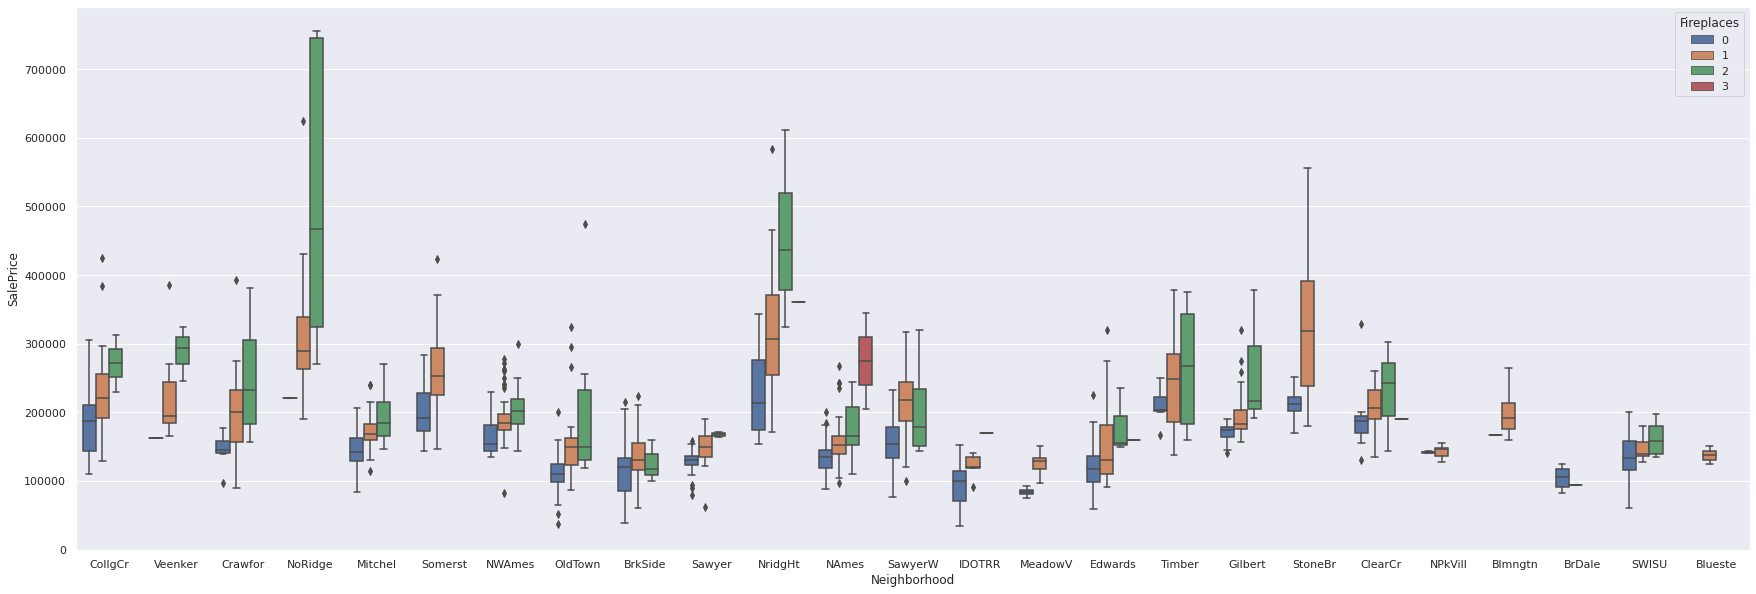

In [1315]:
plt.figure(figsize = (30, 10))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', hue = 'Fireplaces', data = house_pricing)
plt.show()

<font color='purple' size='2'><b> Northridge & Northridge Heights are the most pricey neighbourhood followed by Stone brooks and Timberland</b></font>

<font color='purple' size='2'><b><u>CheckingHow Sales Prices are distributed</u></b></font>

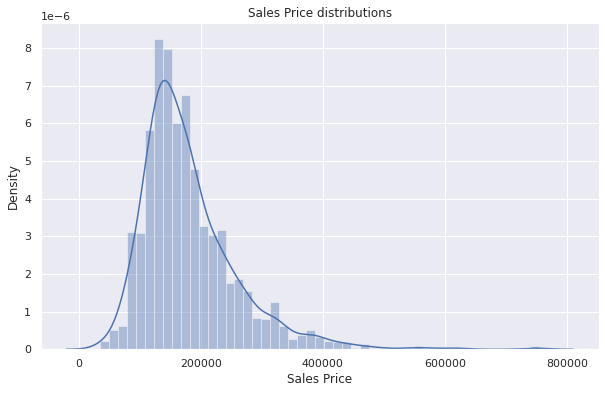

In [1316]:
plt.figure(figsize=(10,6))
sns.distplot(x=house_pricing.SalePrice)
plt.title("Sales Price distributions")
plt.xlabel("Sales Price")
plt.show()

<font color='purple' size='2'><b>Sale Price shows a uniform distribution with mean around 150K</b></font>

<font color='purple' size='2'><b><u>Checking the correlation between different variables</u></b></font>

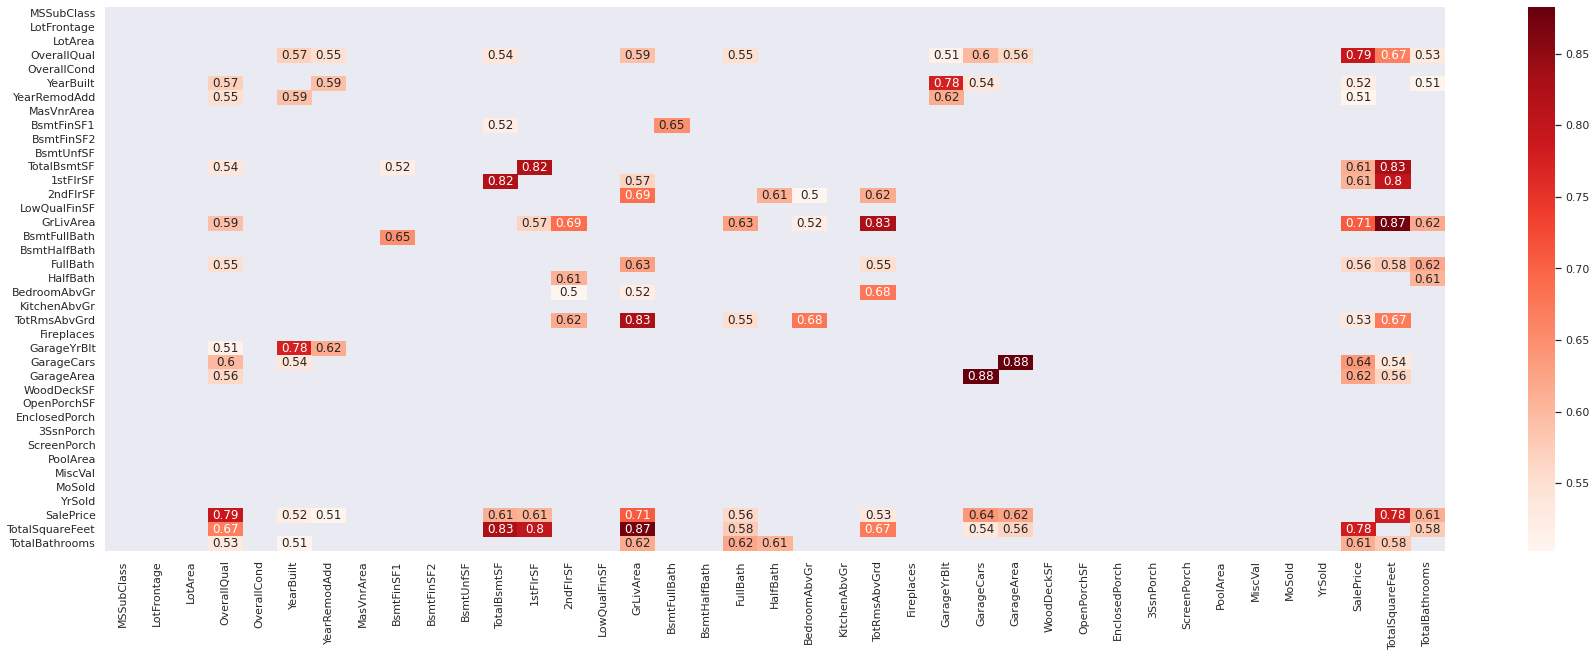

In [1317]:
dfCheck=house_pricing.copy()
#dfCheck.drop("SalePrice",axis=1,inplace=True) #dropping target variable
dfCorr = dfCheck.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

<font color='purple' size='2'><b>Above figures shows highest correlated variables, lets start removing one of them</b></font>

In [1318]:
#GarageCars and GarageArea shows high correlation,lets remove GarageArea as GarageCars will be easy to compute due to small figures
house_pricing.drop('GarageCars',axis=1,inplace=True)


In [1319]:
#GarageYrblt nd YearBuilt shows high correlation,lets remove GarageYrblt
house_pricing.drop('GarageYrBlt',axis=1,inplace=True)

In [1320]:
#TotalBasementSft and TotalSquareFeet shows high correlation,lets remove TotalBasementSft
house_pricing.drop('TotalBsmtSF',axis=1,inplace=True)

In [1321]:
#TotalSquareFeet and 1stFlrSF shows high correlation,lets remove 1stFlrSft
house_pricing.drop('1stFlrSF',axis=1,inplace=True)

In [1322]:
#TotalSquareFeet and GrLivingArea shows high correlation,lets remove GrLivingArea
house_pricing.drop('GrLivArea',axis=1,inplace=True)

In [1323]:
#TotalBathrooms and FullBath & HalfBath shows high correlation,lets remove FullBath & HalfBath
house_pricing.drop('FullBath',axis=1,inplace=True)
house_pricing.drop('HalfBath',axis=1,inplace=True)
house_pricing.drop('BsmtHalfBath',axis=1,inplace=True)
house_pricing.drop('BsmtFullBath',axis=1,inplace=True)

In [1324]:
#Garege Condition and GarageQuality are similar , no need of twofields
house_pricing.drop("GarageCond",axis=1,inplace=True)
#Overall Condition and Overall Quality are similar , no need of twofields
house_pricing.drop("OverallCond",axis=1,inplace=True)
#Paved Drive and Street Seems almost same 
house_pricing.drop("PavedDrive",axis=1,inplace=True)
#Basement Condition and Basement Quality are similar
house_pricing.drop("BsmtQual",axis=1,inplace=True)
#Exterior Condition and Exterioe Quality are similar
house_pricing.drop("ExterQual",axis=1,inplace=True)
#two fields for Basement Finsihed Area rating , lets remove one which is already rated in second
house_pricing.drop("BsmtFinType1",axis=1,inplace=True)
house_pricing.drop("BsmtFinSF1",axis=1,inplace=True)
#Misc Value seems to be not important for target,
house_pricing.drop("MiscVal",axis=1,inplace=True)

#####<font size='4' color='Navy'><b>Step 5. Data Preparation for Modelling</b></font>

<font color='purple' size='2'><b><u>Dummy Variables or One Hot Encoding</u></b></font>

<font color='purple' size='2'>Converting categorical variable values in columns with integer values</font>

In [1325]:
#replace categorical columns with dummy values
categorical_columns=['MSSubClass', 'MSZoning', 'Street','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond',
       'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageQual', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'TotalBathrooms']
continous_columns=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SalePrice', 'TotalSquareFeet']
dummies= pd.get_dummies(house_pricing[categorical_columns],drop_first=True);
house_pricing=pd.concat([house_pricing,dummies],axis=1)
house_pricing.drop(categorical_columns,axis=1,inplace=True)


#####<font size='4' color='Navy'><b>Step 6.Scaling</b></font>

<font color='purple' size='2'><b><u>Min Max Scaling</u></b></font>

<font color='purple' size='2'>Applying min max scaling to standardize data</font>

In [1326]:
##define scalar to apply
scalar=MinMaxScaler()
house_pricing[continous_columns]=scalar.fit_transform(house_pricing[continous_columns])


#####<font size='4' color='Navy'><b>Step 7: Splitting the Data into Training and Testing Sets</font>

In [1327]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(house_pricing, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)


#Dividing into X and Y sets for the model building
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

(1021, 195)
(438, 195)


#####<font size='4' color='Navy'><b>Predict using Linear Regression</font>

In [1328]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

<font color='purple' size='2'>Check R2 value after prediction using linear regression without dropping any variable</font>

In [1329]:
metric=[]
y_pred_train=linear.predict(X_train)
y_pred_test=linear.predict(X_test)
r2_train_lr=r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr=np.sum(np.sum(y_test-y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr=mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9042555059481536
-3.0918761306285256e+24
1.1781387239496903
-7273283134450.635
0.001153906683594212
3.837188553496344e+22


<font color='purple' size='2'><b><u>Linear Regression show very bad value for Test Data , probably due to presence of values with high VIF values , We will evaluate the model using RFE at the end</u></b></font>

#####<font size='4' color='Navy'><b>Step 9: Predict using Ridge Regression</font>

<font color='purple' size='2'>Prediction is now applied using ridge regression to find the best hyperparameter alpha value for the Ridge</font>

In [1330]:
#list of alphas to tune - if value is too high
params= {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge = Ridge()

#cross validation
folds=5
model_cv=GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1331]:
#Print best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.05}


<font color='purple' size='2'><b><u>Best Alpha Value for Ridge is 0.05</u></b></font>

<font color='purple' size='2'>Applying alpha value to do prediction using Ridge</font>

In [1332]:
#Fitting Ridge model for alpha=10 and printing coefficients which have been penalised
alpha =0.05
ridge = Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[-4.16388536e-03  1.42300020e-01  4.98800383e-02 -3.86830351e-02
 -5.15601637e-02  1.33589451e-01  1.72138028e-02  4.95264820e-02
  1.65068334e-02  2.07088868e-02 -9.89433839e-03  4.25394403e-02
  1.79875043e-02  3.54481916e-02  6.57263456e-01  5.98156048e-02
  5.78924637e-02  5.93490415e-02  6.02588518e-02  5.78891056e-03
  4.17436648e-03 -1.86928808e-02  2.20160838e-03  2.26074922e-02
  7.48950917e-03  2.14540089e-02 -3.89126942e-02  1.66949369e-02
 -1.23935975e-02 -1.60101076e-02 -3.68857209e-03  2.69378704e-03
 -2.44908199e-02 -3.01375946e-03 -1.21785729e-03 -1.88162500e-02
 -2.20083595e-02 -1.10710874e-02  2.88065071e-02 -3.67832595e-02
 -4.64434216e-03 -2.17568057e-02 -4.08030717e-02 -2.36793946e-02
 -2.57065725e-02  1.63203368e-02 -9.92445941e-03  4.93204931e-02
  4.32183359e-02 -2.40729113e-02 -7.60346731e-03 -1.72069534e-02
 -1.10762831e-03  2.04090855e-02  4.75605542e-02 -1.95398409e-03
  1.00898116e-02 -6.80321173e-03  1.99348849e-02  2.55517463e-02
  9.60513527e-03 -1.56373

<font color='purple' size='2'><b><u>Check R2 value for Ridge Regression</u></b></font>

In [1333]:
y_pred_train=ridge.predict(X_train)
y_pred_test=ridge.predict(X_test)
metric2=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr=np.sum(np.sum(y_test-y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr=mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9235692668233398
0.8281420699102929
0.9404823467606303
0.7908325559058729
0.00092113843953049
0.0021328515577813388


<font color='purple' size='2'><b><u>R2 value for Train data is 0.923 and for Test data is 0.828 , the ridge presiction is having a good value</u></b></font>

#####<font size='4' color='Navy'><b>Residual Analysis of the train data after prediction using Ridge</font>
Check whether error terms are normally distributed

Text(0.5, 0, 'Errors')

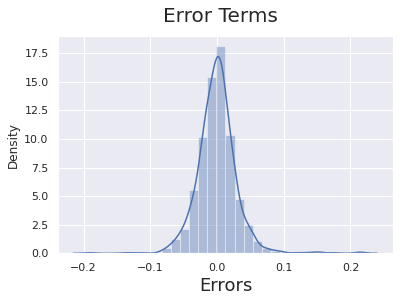

In [1334]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

<font color='purple' size='2'><b>Error terms are normally distributed , so linear regression assumption on error terms is correct</b></font>

#####<font size='4' color='Navy'><b>Step 9: Predict using Lasso Regression</font>

<font color='purple' size='2'>Prediction is now applied using lasso regression to find the best hyperparameter alpha value for the Ridge</font>

In [1335]:
lasso = Lasso()

#cross validation
model_cv=GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1336]:
#Print best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


<font color='purple' size='2'><b><u>Best Alpha Value for Lasso is 0.0001</u></b></font>

<font color='purple' size='2'>Applying alpha value to do prediction using Lasso</font>

In [1337]:
#Fitting Ridge model for alpha=10 and printing coefficients which have been penalised
alpha =0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
print(ridge.coef_)

[-4.16388536e-03  1.42300020e-01  4.98800383e-02 -3.86830351e-02
 -5.15601637e-02  1.33589451e-01  1.72138028e-02  4.95264820e-02
  1.65068334e-02  2.07088868e-02 -9.89433839e-03  4.25394403e-02
  1.79875043e-02  3.54481916e-02  6.57263456e-01  5.98156048e-02
  5.78924637e-02  5.93490415e-02  6.02588518e-02  5.78891056e-03
  4.17436648e-03 -1.86928808e-02  2.20160838e-03  2.26074922e-02
  7.48950917e-03  2.14540089e-02 -3.89126942e-02  1.66949369e-02
 -1.23935975e-02 -1.60101076e-02 -3.68857209e-03  2.69378704e-03
 -2.44908199e-02 -3.01375946e-03 -1.21785729e-03 -1.88162500e-02
 -2.20083595e-02 -1.10710874e-02  2.88065071e-02 -3.67832595e-02
 -4.64434216e-03 -2.17568057e-02 -4.08030717e-02 -2.36793946e-02
 -2.57065725e-02  1.63203368e-02 -9.92445941e-03  4.93204931e-02
  4.32183359e-02 -2.40729113e-02 -7.60346731e-03 -1.72069534e-02
 -1.10762831e-03  2.04090855e-02  4.75605542e-02 -1.95398409e-03
  1.00898116e-02 -6.80321173e-03  1.99348849e-02  2.55517463e-02
  9.60513527e-03 -1.56373

<font color='purple' size='2'><b><u>Check R2 value for Lasso Regression</u></b></font>

In [1338]:
y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(X_test)
metric3=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr=np.sum(np.sum(y_test-y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr=mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8807921536006005
0.8342079822379211
1.4668559422929126
0.2181028300561884
0.0014366855458304727
0.002057570245184396


<font color='purple' size='2'><b><u>R2 value for Train data is 0.880 and for Test data is 0.834 , the lasso presiction is having a good value between test and train data</u></b></font>

#####<font size='4' color='Navy'><b>Residual Analysis of the train data after Lasso Prediction</font>
Check whether error terms are normally distributed

Text(0.5, 0, 'Errors')

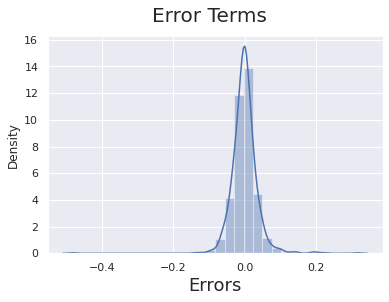

In [1339]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#####<font size='4' color='Navy'><b>Creating a table which contain all the metrics</font>

In [1340]:
#Creating a table which contain all the metrics

lr_table={'Metric':['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'],'Linear Regression':metric}
lr_table
lr_metric = pd.DataFrame(lr_table,columns=['Metric','Linear Regression'])
rg_metric =pd.Series(metric2,name='Ridge Regression')
ls_metric =pd.Series(metric3,name='Lasso Regression')
final_metric=pd.concat([lr_metric,rg_metric,ls_metric],axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.042555e-01,0.923569,0.880792
1,R2 Score (Test),-3.091876e+24,0.828142,0.834208
2,RSS (Train),1.178139e+00,0.940482,1.466856
3,RSS (Test),-7.273283e+12,0.790833,0.218103
4,MSE (Train),3.396920e-02,0.030350,0.037904
5,MSE (Test),1.958874e+11,0.046183,0.045360


#####<font size='4' color='Navy'><b>Lasso regression has best score on test data and minimum difference between train and test prediction</font>

#####<font size='4' color='Navy'><b>Step 10: Check coefficients for each regression</font>

In [1341]:
betas = pd.DataFrame(index=df_train.columns)
betas.rows=df_train.columns
betas['Linear']=linear.coef_
betas['Ridge']=ridge.coef_
betas['Lasso']=lasso.coef_
pd.set_option('display.max_rows',None)
display(betas)

,Linear,Ridge,Lasso
LotFrontage,2.752930e-02,-0.004164,-0.000000
LotArea,1.564104e-01,0.142300,0.034678
MasVnrArea,5.755062e-02,0.049880,0.034033
BsmtFinSF2,-5.273699e-02,-0.038683,-0.000000
BsmtUnfSF,-6.347160e-02,-0.051560,-0.028564
2ndFlrSF,1.132668e-01,0.133589,0.135388
LowQualFinSF,1.606211e-02,0.017214,0.000000
GarageArea,3.375488e-02,0.049526,0.062790
WoodDeckSF,1.128049e-02,0.016507,0.016426
OpenPorchSF,2.924526e-02,0.020709,0.006524


#####<font size='4' color='Navy'><b>Model Validation using RFE</font>

Lets apply LAsso regression and do an RFE to find out best coefficients and validate model

In [1342]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=Lasso(alpha=0.0001)
lm = lm.fit(X_train, y_train)
rfe = RFE(estimator=ridge, n_features_to_select=20)   
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 155),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF2', False, 52),
 ('BsmtUnfSF', False, 30),
 ('2ndFlrSF', False, 14),
 ('LowQualFinSF', False, 83),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 44),
 ('OpenPorchSF', False, 76),
 ('EnclosedPorch', False, 33),
 ('3SsnPorch', False, 16),
 ('ScreenPorch', False, 95),
 ('PoolArea', False, 12),
 ('TotalSquareFeet', True, 1),
 ('MSZoning_FV', False, 21),
 ('MSZoning_RH', False, 20),
 ('MSZoning_RL', False, 19),
 ('MSZoning_RM', False, 22),
 ('Street_Pave', False, 149),
 ('LotShape_IR2', False, 157),
 ('LotShape_IR3', False, 38),
 ('LotShape_Reg', False, 162),
 ('LandContour_HLS', False, 79),
 ('LandContour_Low', False, 115),
 ('LandContour_Lvl', False, 80),
 ('Utilities_NoSeWa', False, 62),
 ('LotConfig_CulDSac', False, 63),
 ('LotConfig_FR2', False, 121),
 ('LotConfig_FR3', False, 118),
 ('LotConfig_Inside', False, 156),
 ('LandSlope_Mod', False, 160),
 ('LandSlope_Sev', False, 23),
 ('Neighborhoo

In [1343]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'MasVnrArea', 'GarageArea', 'TotalSquareFeet',
       'Condition2_PosN', 'Condition2_RRAe', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'KitchenQual_Fa', 'Functional_Sev', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd'],
      dtype='object')


Building model using statsmodel, for the detailed statistics

In [1344]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     188.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          9.78e-322
Time:                        17:43:33   Log-Likelihood:                 1603.6
No. Observations:                1021   AIC:                            -3165.
Df Residuals:                    1000   BIC:                            -3062.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1759      0

Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [1345]:
vif = pd.DataFrame()
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,RoofMatl_CompShg,263.26
15,GarageType_Attchd,179.24
19,GarageType_Detchd,73.89
17,GarageType_BuiltIn,18.73
3,TotalSquareFeet,15.94
2,GarageArea,9.47
16,GarageType_Basment,4.27
18,GarageType_CarPort,3.01
10,RoofMatl_Tar&Grv,2.83
0,LotArea,2.09


Dropping high VIF variables

In [1346]:
X_train_rfe = X_train_rfe.drop(['RoofMatl_CompShg'], axis=1)

In [1347]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     136.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          8.15e-262
Time:                        17:43:33   Log-Likelihood:                 1459.3
No. Observations:                1021   AIC:                            -2879.
Df Residuals:                    1001   BIC:                            -2780.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1541      0

Checking VIF after dropping

In [1348]:
vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalSquareFeet,15.66
2,GarageArea,9.05
14,GarageType_Attchd,7.62
18,GarageType_Detchd,2.83
0,LotArea,2.09
16,GarageType_BuiltIn,1.82
1,MasVnrArea,1.69
13,Functional_Sev,1.38
9,RoofMatl_Tar&Grv,1.24
17,GarageType_CarPort,1.22


In [1349]:
X_train_rfe = X_train_rfe.drop(['GarageArea'], axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.78e-232
Time:                        17:43:33   Log-Likelihood:                 1385.9
No. Observations:                1021   AIC:                            -2734.
Df Residuals:                    1002   BIC:                            -2640.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0668      0

In [1350]:
vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalSquareFeet,11.96
13,GarageType_Attchd,7.25
17,GarageType_Detchd,2.56
0,LotArea,2.08
15,GarageType_BuiltIn,1.76
1,MasVnrArea,1.66
12,Functional_Sev,1.38
8,RoofMatl_Tar&Grv,1.24
16,GarageType_CarPort,1.21
14,GarageType_Basment,1.12


In [1351]:
#GarageArea seems less important than Total Sqaure feet
X_train_rfe = X_train_rfe.drop(['GarageType_Attchd'], axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     123.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          4.74e-232
Time:                        17:43:34   Log-Likelihood:                 1384.0
No. Observations:                1021   AIC:                            -2732.
Df Residuals:                    1003   BIC:                            -2643.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0046      0

In [1352]:
vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalSquareFeet,3.13
0,LotArea,2.08
1,MasVnrArea,1.61
12,Functional_Sev,1.37
8,RoofMatl_Tar&Grv,1.24
16,GarageType_Detchd,1.24
15,GarageType_CarPort,1.17
14,GarageType_BuiltIn,1.14
10,RoofMatl_WdShngl,1.04
11,KitchenQual_Fa,1.03


Run Prediction

In [1353]:
y_pred_train=lm.predict(X_train_rfe)
X_test_new = sm.add_constant(X_test)
y_pred_test=lm.predict(X_test_new[X_train_rfe.columns])

In [1354]:

r2_train_lr=r2_score(y_train,y_pred_train)
print(r2_train_lr)
#metric.append(r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print(r2_test_lr)
#metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
#metric.append(rss1_lr)

rss2_lr=np.sum(np.sum(y_test-y_pred_test))
print(rss2_lr)
#metric.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
#metric.append(mse_train_lr**0.5)

mse_test_lr=mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
#metric.append(mse_test_lr**0.5)

0.6770814194902914
0.6179411015895114
3.973522322603121
1.9760100494454218
0.0038917946352626065
0.004741561336236746


R2 Train is 0.67 and R2 value on test on 0.61 which is very near 

Plotting the spread

Text(0, 0.5, 'y_pred')

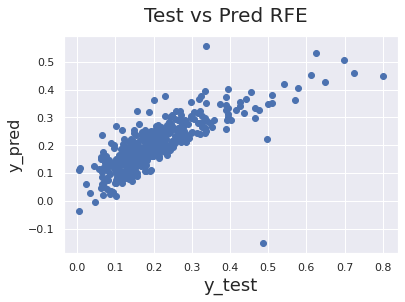

In [1355]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('Test vs Pred RFE', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

#####<font size='4' color='Navy'><b>Residual Analysis of the train data after Lasso Regression using RFE</font>
Check whether error terms are normally distributed

Text(0.5, 0, 'Errors')

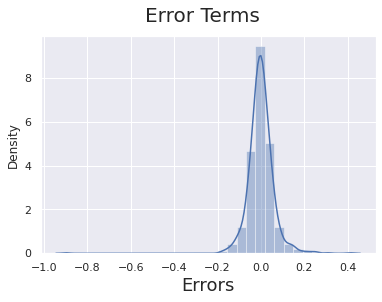

In [1356]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Error terms are normally distributed , so linear regression assumption on error terms is correct

#####<font size='4' color='Navy'><b>Summary</font>
Variables affecting the market

In [1364]:
betas.columns

Index(['Linear', 'Ridge', 'Lasso'], dtype='object')

In [1366]:
betas["lasso_abs"]=abs(betas['Lasso'])

In [1374]:
betas.sort_values(by=["lasso_abs"],ascending=False).head(10)

,Linear,Ridge,Lasso,lasso_abs
TotalSquareFeet,0.759705,0.657263,0.466965,0.466965
Condition2_PosN,-0.394540,-0.466454,-0.300158,0.300158
RoofMatl_WdShngl,1.041821,0.657062,0.154172,0.154172
2ndFlrSF,0.113267,0.133589,0.135388,0.135388
KitchenQual_TA,-0.064792,-0.072099,-0.076317,0.076317
KitchenQual_Fa,-0.078417,-0.066761,-0.071485,0.071485
Neighborhood_NoRidge,0.031848,0.049320,0.070435,0.070435
GarageArea,0.033755,0.049526,0.062790,0.062790
KitchenQual_Gd,-0.060689,-0.063866,-0.062130,0.062130
Neighborhood_NridgHt,0.021756,0.043218,0.058571,0.058571


From the RFE validation below are the important variables affecting the prcing of house in the market are
<font color='Green'>
<b>
<br />
1) TotalSquareFeet - Total Square Feet of the property <br />
2)	Condition2	- Near to positve off site deature like park , greenbelt <br />
3)	RoofMatl - Roof material is wood shingles <br />
4)	KitchenQuality	- Kitchen Quality is Average or Fair or Good <br />
5)	2nd floor Square Feet - Second Floow Square feet area <br />
6)	Neighbourhood - Neighbourhood is North ridge <br />
7)  Garage Area - Garage Area <br />
</font>
</b>

Linear equation is
> 0.466965 * Total Square Feet Area + 0.300158 * Condition Near Positive Feature + 0.154172 * RoofMatl + 0.135388 * Second Floor Area

An Increase in One unit of Square feet will cause 0.466965 change in the price.

If house is near a positive feature it will cause 0.300 increase in price